<a href="https://colab.research.google.com/github/Fitriasg/Belajar-Python/blob/main/MINI_PROJECT___Data_Visualization_with_Python_Matplotlib_for_Beginner_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apa dan kenapa Matplotlib?

Dalam menganalisa sebuah data
- Sering kali menggunakan visualisasi data untuk memahami karakteristik maupun trend di dalam sebuah data.
- Di dalam pyhton ada library yang dapat digunakan untuk keperluan visualisasi dara yaitu matplotlib.

Apa saja yang dapat dilakukan dengan matplotlib?
- Pengolahan dataset (menggunakan library Numpy & Pandas)
- Membuat grafik dasar menggunakan Matplotlib
- Melakukan modifikasi komponen visualisasi, seperti : *axis,labels,title dan legend.*
- Menyimpan plot visualisasi yang sudah dibuat

  Dalam membuat visualisasi tentunya hal pertama yang akan kita lakukan yaitu mengenal dataset yang akan kita gunakan.
  Dalam tugas ini kita akan menggunakan data yang sudah disiapkan oleh Tim DQlab dan dapat diakses dengan mudah.

In [ ]:
# Pengenalan Dataset

import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')


In [ ]:
# kita akan melihat ukuran dari dataset seperti baris dan kolom dan mencetak 5 teratas

print('Ukuran dataset : %d baris dan %d kolom' % dataset.shape)
print('Lima data teratas:')
print(dataset.head(5))

Ukuran dataset : 5000 baris dan 9 kolom
Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


Penjelasan mengenai setiap kolom dalam dataset:
- Order_id : ID dari setiap transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan 1 customer.
- Order_date : Tanggal dari terjadinya transaksi
- Customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan beberapa kali transaksi.
- City : Kota terjadinta transaksi
- Province : Provinsi terjadintya transaksi
- Product_id : ID dari suatu *product* yang dibeli.
- Brand : Merk dari suatu *product* 
- Quantity : Kuantitas *product* yang dibeli.
- Item_price : Harga setiap 1 *product* dalam rupiah. Suatu *Product* yang sama, bisa jadi memiliki harga yang berbeda saat dibeli.


In [ ]:
# melihat type dari dataset serta dapat juga melihat apakah data tersebut ada data kos dapat menggunakan syntax .info()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


Dilihat dari dataset.info() : 
- Total ada 5000 entries dari 0 sampai 4999.
- Tidak ada data kosong
- Dapat melihat type data setiap kolom nya berupa int dan obj

Bagimana menampilkan Gross Merchandise Value atau total uang yang dibayarkan *customer*? 
- Pertama kita akan membuat order month untuk mempermudah dalam pembuatan kolom GMV.
- Membuat grafik GMV dengan order month

In [ ]:
# Membuat kolom order month pada dataset

import datetime
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Syntax pembuatan kolom order month

dataset['order_month'] = dataset['order_date'].apply(lambda x:
datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head(5))

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


In [ ]:
# melihat tipe data order_id

type('order_id')
type('order_month')

str

Penjelasan beberapa function yang ada diatas:
- apply & lambda : Biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom yang sudah ada. (Misal .apply(lambda x:x*2) berarti setiap input x di dalam kolom akan diubah menjadi x*2). Dalam hal ini yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja.
- Function datetime.datetime.strptime : Digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
- Function strftime : Digunakan untuk mengubah format data bertipe datetime. Dalam hal ini akan diubah menjadi %Y-%m berarti inputnya hanya tahun dan bulan saja.

Definisi GMV : Perkalian setiap entri di kolom item_price dan kolom quantity.

In [ ]:
# Penambahan kolom GMV pada Dataset

dataset['gmv'] = dataset['item_price']*dataset['quantity']

print('Ukuran dataset : %d baris dan %d kolom' % dataset.shape)
print('Lima data teratas:')
print(dataset.head(5))

Ukuran dataset : 5000 baris dan 11 kolom
Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


Plot Pertama : Membuat line chart trend pertumbuhan GMV

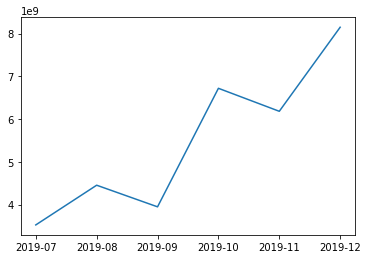

In [ ]:
# Library yang dibutuhkan untuk plot grafik
import matplotlib.pyplot as plt

# Di sumbu X akan mendefinisikan order_month sedangkan sumbu Y akan di definisikan gmv
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

Grafik diatas masih sangat sederhana, belum memiliki judul dan minim informasi. Hanya dapat disimpulkan bahwa setiap bulannya mengalami kenaikan.

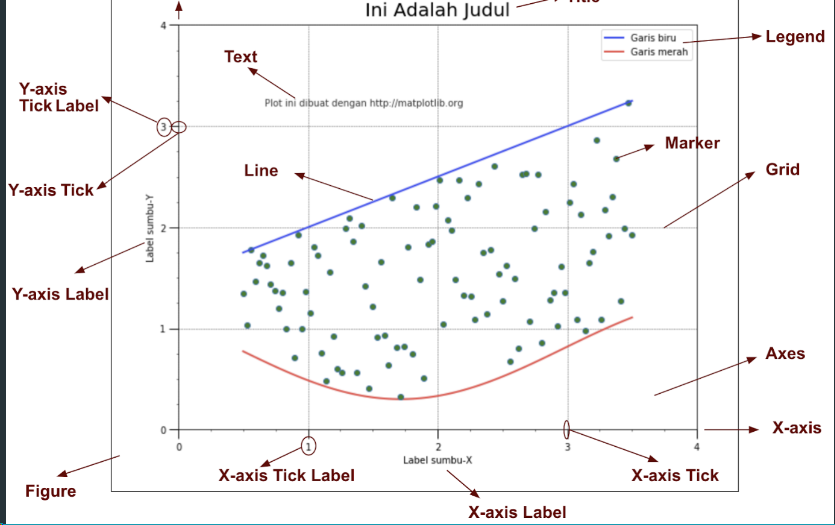

Untuk melengkapi grafik diatas kita akan menambahkan:
- Title dan Axis label
- Kustomisasi line dan Point
- Kustomisasi Grid
- Kustomisasi Axis Ticks
- Menentukan Batas Minimum dan Maksimum Axis Ticks
- Menambahkan info pada plot
- Serta menyimpan hasil plot

<function matplotlib.pyplot.show(*args, **kw)>

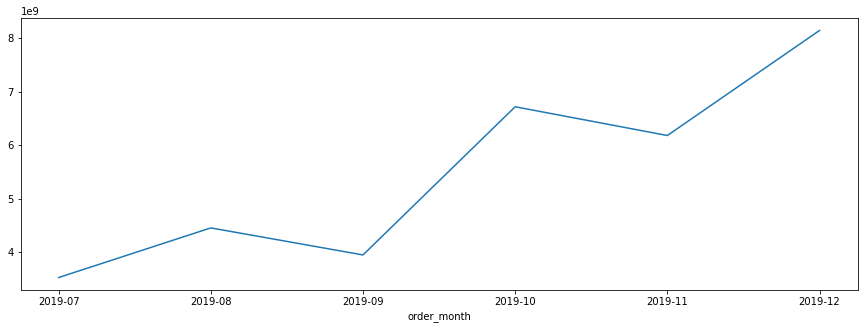

In [ ]:
# Mengubah Figure size atau ukuran grafik 

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show

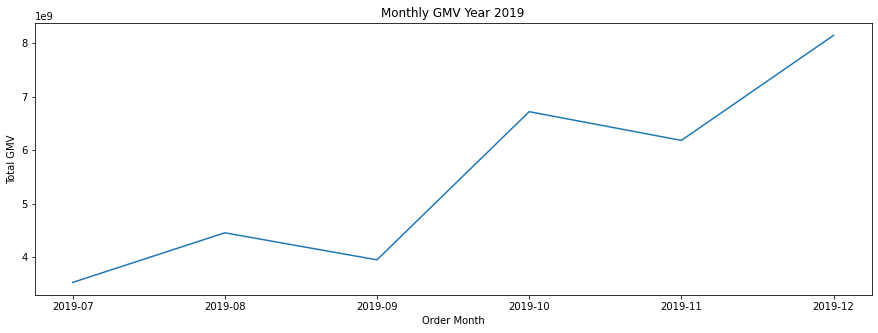

In [ ]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()

# Menambahkan Title dan Axis Labels

plt.title('Monthly GMV Year 2019') 
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

- Selanjutnya kita akan mengatur posisi title atau judul bisa dibuat rata kiri, rata kanan atau tengah.
- Pad digunakan untuk menambah jarak antara judul ke grafik.
- Fontsize digunakan untuk mengganti ukuran huruf.
- Color digunakan untuk mengganti warna huruf seperti 'blue','red','orange' dsb.
- Linewidth untuk mengubah ketebalan line/garisnya.
- Linestyle untuk mengubah jenis dari garis.
- Marker digunakan untuk mengubah tipe point/titik data di chart.


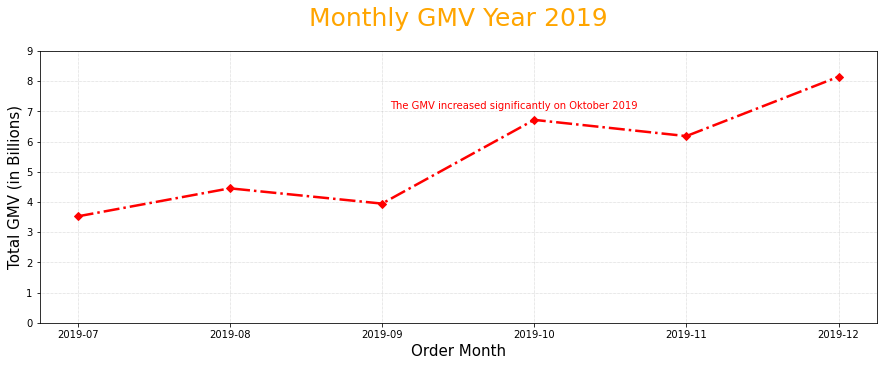

In [ ]:
# Jangan lupa definisikan Fig=
fig = plt.figure(figsize=(15, 5)) 

# Penambahan untuk line dan point

dataset.groupby(['order_month'])['gmv'].sum().plot(color='red', marker='D', linestyle='-.', linewidth=2.5)

# Menambahkan loc, pad, fontsize, color

plt.title('Monthly GMV Year 2019', loc='center', pad=25, fontsize=25, color='orange') 
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total GMV (in Billions)', fontsize=15)

# Penambahan kustomisasi Grid
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)

# Penambahan batas minimum dan maksimum axis ticks
plt.ylim(ymin=0)

# Penambahan Axis Thicks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

# Penambahan informasi text di plot

plt.text(0.45,0.72, 'The GMV increased significantly on Oktober 2019', transform = fig.transFigure, color='red')

# Menyimpan hasil plot menjadi file image
plt.savefig('Monthly_gmv.png', quality=95)
plt.show()

Dapat dilihat dari grafik diatas bahwa GMV dari bulan ke-10 atau oktober 2019 mengalami kenaikan yang signifikan dari sebelumnya yang stagnan disekitar 300-400 miliar per bulan.
 Kita bisa menambahkan informasi pada plot

Pertanyaan:
Buatlah sebuah line chart dengan matplotlib dengan menunjukkan jumlah pembeli harian (*daily number of customers*) selama bulan desember.

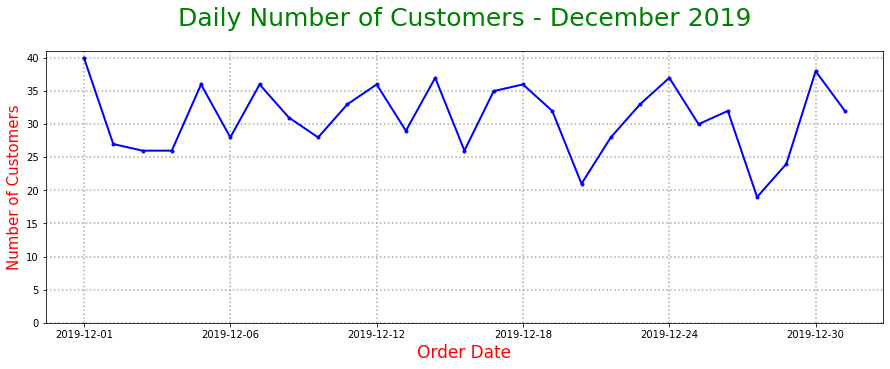

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# membuat kolomm order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x:
datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

# Membuat kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Jangan lupa definisikan Fig=
fig = plt.figure(figsize=(15, 5)) 

# Mencari jumalah pembeli harian selama bulan desember
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='blue', marker='.', linewidth=2)

# Menambahkan loc, pad, fontsize, color

plt.title('Daily Number of Customers - December 2019', loc='center',pad=25, fontsize=25, color='green') 
plt.xlabel('Order Date', fontsize=17, color='red')
plt.ylabel('Number of Customers', fontsize=15, color='red')

# Penambahan kustomisasi Grid
plt.grid(color='darkgrey', linestyle=':', linewidth=1.5)

# Penambahan batas minimum dan maksimum axis ticks
plt.ylim(ymin=0)


# Menyimpan hasil plot menjadi file image
plt.savefig('Monthly_gmv.png', quality=95)
plt.show()

- Dari hasil grafik diatas dapat kita simpulkan jumlah pembeli harian mengalami kenaikan tertinggi pada tanggal 01 Desember sedangkan mengalami penurunan terbanyak di tanggal 27 Desember. 
- Dari seluruh total pembeli harian sekitar 20-40 Customer yang melakukan transaksi. 

**Kesimpulan**:
- Pada materi kali ini Data Visualization with Python Matplotlib for Beginner - Part 1. Berdasarkan materi yang sudah kita pelajari bisa disimpulkan, kita sudah mendapatkan pengetahuan dan praktik yang diantaranya:
  - Mempersiapkan terlebih dahulu data yang dibutuhkan,
  - Membuat plot dari data yang telah dipersiapkan,
  - Mengkostumisasi berbagai komponen di chart yang telah dibuat, seperti Figure size, title, axis labels, axis ticks, style dari line/point di chart dan sebagainya,
  - Menyimpan gambar yang telah dibuat.